Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [2]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [48]:
# Hyper-parameters data-loading and formatting


batch_size = 128 #specifies the number of samples used in each training iteration.
num_classes = 10 # The amount of neurons in the output layer, each corresponding to a specific class. [0,...,9]
epochs = 10 # The number of times the entire training data set is used during training.

img_rows, img_cols = 28, 28 # image dimensions.

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

#Makes sure that the input data is shaped in a way that works with the Keras framework.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Question 1.1: See comments in the block below for explanations.

**Preprocessing**

In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train)
print(x_test)
#pixelvalues are normalized to the range 0 to 1
x_train /= 255
x_test /= 255
print(y_train)
print(y_test)
#one-hot encoding, so 
#the training and test labels (categorical data variables)
#are converted to a binary matrix that can be fed to the machine learning algo
# for example [0,1,2,3] = [[1,0,0,0],
#                          [0,1,0,0]
#                          [0,0,1,0]
#                          [0,0,0,1]]

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)
print(y_train)
print(y_test)
#
len(x_train) # = 60 000

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

60000

In [50]:
## Define model ##
model = Sequential() #Allows us to build NN by stacking layers on top of each other

#converts 2D input to a 1D vector
#används som transition layer mellan convolutional layers and fully connected layers
#snarare input layer??
model.add(Flatten())

#relu introduces the non-linearity property to the model
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#softmax to get probability dist over the classes (e.g. 0 to 9)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4960 - accuracy: 0.8576 - val_loss: 0.2586 - val_accuracy: 0.9266
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2381 - accuracy: 0.9304 - val_loss: 0.1985 - val_accuracy: 0.9397
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1859 - accuracy: 0.9457 - val_loss: 0.1605 - val_accuracy: 0.9507
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1535 - accuracy: 0.9556 - val_loss: 0.1504 - val_accuracy: 0.9542
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1310 - accuracy: 0.9619 - val_loss: 0.1263 - val_accuracy: 0.9606
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1119 - accuracy: 0.9679 - val_loss: 0.1077 - val_accuracy: 0.9663
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9712 - val_loss: 0.1044 - val_accuracy: 0.9672
Epoch 

Question 2: Network model, training, and changing hyper-parameters

In [51]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_109 (Dense)           (None, 64)                50240     
                                                                 
 dense_110 (Dense)           (None, 64)                4160      
                                                                 
 dense_111 (Dense)           (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [52]:

64*65

4160

2.1. How many layers does the network in the notebook have? How many neurons does each layer have? 
What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? 
Why do the input and output layers have the dimensions they have?

Answer:
1. Input layer: 28x28=784 input neurons. Flattening layer that converts matrix input to a vector
2. Dense layer, consists of 64 neurons
3. Dense layer, consists of 64 neurons
4. Output layer: 10 sigmoid neurons (representing the numbers 0 to 9)

There are two different activation functions here, relu and softmax.
The relu (rectified linear unit) function introduces non-linearity to the output of the previous layer. It does this by setting the negative values to 0 (whilst not changing the positive ones). Relu is easier to compute than that the sigmoid function and it greatly speeds up training, another positive aspect of is that it dosen't saturate it's neurons as badly as the Sigmoid function - Sigmoid has to squish an infinite range into a finite range $[0,1]$, this makes the partial derivative with respect to a certain weight very small, leading to minimal changes in weight connected to the neuron during backpropagation. This in term leads worse results and slower convergence.

$$Relu(x) = max(0,x)$$

Softmax activation function is used to get probability distributions over the classes. It uses the output of the previous layer and transforms it into a probability distribution (and at the same time ensuring that the probabilities add up to 1). It is important here because it lets us compare the predicted probabilities from the different numbers (classes).

$$Softmax(X) = \frac{exp(x_j)}{\sum{i=1}{n}exp(x_i)} for j = 1,...,n $$ 

The total number of parameters is 55 050 (which we can see in the output of the cell above).
For the input layer every neuron represents a pixel in the input image, every image consists of 784 pixels, hense 784 input neurons.
Every neuron of the output layer represents a single class. we have 10 classes (binary digits from 0 to 9) hense we get 10 neurons.


2.2. What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function is the categorical_crossentropy. It is appropriate since we are dealing with multiple classes. It based around using one-hot category encoding value in form of 0s and 1 to the output label.

$$L_{CE}(s_1) = {-}\sum_{i=1}^{n} T_i Log(S_i)$$ 

$S$ is a vector with the actual output values. $T$ is a vector with corresponding expected value or true value. For our case only one value in the vector $T$ will be equal to 1 and the rest is 0. 
This means that categorical crossentropy only depends on $S_i$ if  $T_i = 1$. as $S_i$ approaches 1, the value of $L_{CE}$ will go to zero, and as the value of $S_i$ approaches 0 $L_{CE}$ goes to infinity

Categorical crossentropy is good for our model since we want our model to choose between 10 different classes, and the categorical crossentropy function works for an arbitrary number of classes, as opposed to the binary crossentropy function which can only put things into two categories.


2.3. Train the network for 10 epochs and plot the training and validation accuracy for each epoch

In [53]:
## Define model ##
model_2 = Sequential()

model_2.add(Flatten())

model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(64, activation = 'relu'))

model_2.add(Dense(num_classes, activation='softmax'))


model_2.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model_2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.8653 - val_loss: 0.2628 - val_accuracy: 0.9211
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2281 - accuracy: 0.9334 - val_loss: 0.1871 - val_accuracy: 0.9441
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.9496 - val_loss: 0.1751 - val_accuracy: 0.9465
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1446 - accuracy: 0.9578 - val_loss: 0.1288 - val_accuracy: 0.9610
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.9636 - val_loss: 0.1177 - val_accuracy: 0.9634
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1093 - accuracy: 0.9671 - val_loss: 0.1109 - val_accuracy: 0.9655
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9711 - val_loss: 0.1085 - val_accuracy: 0.9666
Epoch 

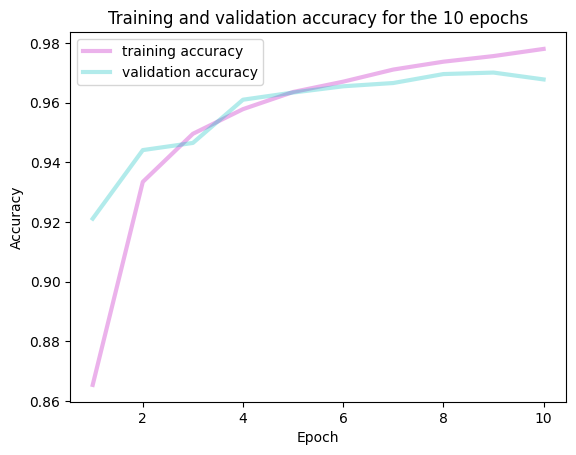

In [54]:
train_accuracy= fit_info.history['accuracy']
label_1='training accuracy'
label_2='validation accuracy'
val_accuracy= fit_info.history['val_accuracy']
x_epoch=list(range(1,11))
plt.plot(x_epoch, train_accuracy, 'm', label = label_1, linewidth=3, alpha=0.3)
plt.plot(x_epoch, val_accuracy, 'c', label = label_2, linewidth=3, alpha=0.3)
plt.legend()
plt.title('Training and validation accuracy for the 10 epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

2.4. Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights 2 (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

Answer: It is possible that amount of epochs is what gives us a result lower than Geoff Hintons since we do not know how many epochs he had. We also don't know the regularization factors between 0.000001 and 0.001 were used.

In [57]:

## Define model ##
regularization_factors=[0.001,0.0001,0.0009,0.00001,0.000001]
val_acc_0_001=[]
val_acc_0_0001=[]
val_acc_0_0009=[]
val_acc_0_00001=[]
val_acc_0_000001=[]

#regularization factor 0.001
for _ in range(3):
    model_3 = Sequential()
    model_3.add(Flatten())
    model_3.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.001)))
    model_3.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
    model_3.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
    model_3.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))

    model_3.add(Dense(num_classes, activation='softmax'))

    model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'],)
    epochs = 40
    fit_info = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_3.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_001.append(fit_info.history['val_accuracy'][-1])

mean_0_001= np.mean(val_acc_0_001)
std_0_001=np.std(val_acc_0_001)
#print(val_acc_0_001)
print('mean=', mean_0_001)
print('std=', std_0_001)



Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 7.0527 - accuracy: 0.8057 - val_loss: 3.3614 - val_accuracy: 0.9089
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 1.9877 - accuracy: 0.8828 - val_loss: 1.2773 - val_accuracy: 0.8655
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 1.0479 - accuracy: 0.8945 - val_loss: 0.9188 - val_accuracy: 0.9005
Epoch 4/40
469/469 [==============================] - 2s 3ms/step - loss: 0.8260 - accuracy: 0.9043 - val_loss: 0.7090 - val_accuracy: 0.9272
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 0.7066 - accuracy: 0.9153 - val_loss: 0.6358 - val_accuracy: 0.9290
Epoch 6/40
469/469 [==============================] - 2s 3ms/step - loss: 0.6484 - accuracy: 0.9191 - val_loss: 0.6657 - val_accuracy: 0.9135
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.6401 - accuracy: 0.9162 - val_loss: 0.5692 - val_accuracy: 0.9324
Epoch 

Epoch 18/40
469/469 [==============================] - 2s 3ms/step - loss: 0.4782 - accuracy: 0.9383 - val_loss: 0.4360 - val_accuracy: 0.9497
Epoch 19/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5127 - accuracy: 0.9298 - val_loss: 0.4623 - val_accuracy: 0.9439
Epoch 20/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5657 - accuracy: 0.9190 - val_loss: 0.5089 - val_accuracy: 0.9335
Epoch 21/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4824 - accuracy: 0.9362 - val_loss: 0.4446 - val_accuracy: 0.9473
Epoch 22/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5207 - accuracy: 0.9261 - val_loss: 0.6276 - val_accuracy: 0.8826
Epoch 23/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5416 - accuracy: 0.9241 - val_loss: 0.4349 - val_accuracy: 0.9492
Epoch 24/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4453 - accuracy: 0.9431 - val_loss: 0.4036 - val_accuracy: 0.9543

Epoch 35/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5036 - accuracy: 0.9249 - val_loss: 0.5540 - val_accuracy: 0.9121
Epoch 36/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4647 - accuracy: 0.9334 - val_loss: 0.4857 - val_accuracy: 0.9263
Epoch 37/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4834 - accuracy: 0.9289 - val_loss: 0.4430 - val_accuracy: 0.9402
Epoch 38/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4482 - accuracy: 0.9366 - val_loss: 0.4903 - val_accuracy: 0.9180
Epoch 39/40
469/469 [==============================] - 2s 3ms/step - loss: 0.4862 - accuracy: 0.9275 - val_loss: 0.4378 - val_accuracy: 0.9332
Epoch 40/40
469/469 [==============================] - 2s 3ms/step - loss: 0.4439 - accuracy: 0.9369 - val_loss: 0.4476 - val_accuracy: 0.9303
Test loss: 0.4475939869880676, Test accuracy 0.9302999973297119
mean= 0.9378666679064432
std= 0.005741269074370668


In [59]:
#regularization factor 0.0001
for _ in range(3):
    model_4 = Sequential()
    model_4.add(Flatten())
    model_4.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.0001)))
    model_4.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.0001)))
    model_4.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.0001)))
    model_4.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.0001)))

    model_4.add(Dense(num_classes, activation='softmax'))
    model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_4.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0001.append(fit_info.history['val_accuracy'][-1])

mean_0_0001= np.mean(val_acc_0_0001)
std_0_0001=np.std(val_acc_0_0001)
#print(val_acc_0_0001)
print('mean=', mean_0_0001)
print('std=', std_0_0001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 1.5852 - accuracy: 0.8302 - val_loss: 1.3009 - val_accuracy: 0.9011
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 1.1484 - accuracy: 0.9383 - val_loss: 1.0847 - val_accuracy: 0.9432
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 1.0084 - accuracy: 0.9531 - val_loss: 0.9604 - val_accuracy: 0.9546
Epoch 4/40
469/469 [==============================] - 2s 3ms/step - loss: 0.8971 - accuracy: 0.9623 - val_loss: 0.8535 - val_accuracy: 0.9610
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 0.8026 - accuracy: 0.9674 - val_loss: 0.7672 - val_accuracy: 0.9639
Epoch 6/40
469/469 [==============================] - 2s 3ms/step - loss: 0.7192 - accuracy: 0.9708 - val_loss: 0.6881 - val_accuracy: 0.9679
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.6448 - accuracy: 0.9730 - val_loss: 0.6393 - val_accuracy: 0.9648
Epoch 

Epoch 18/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2506 - accuracy: 0.9797 - val_loss: 0.2717 - val_accuracy: 0.9719
Epoch 19/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2322 - accuracy: 0.9820 - val_loss: 0.2579 - val_accuracy: 0.9722
Epoch 20/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2228 - accuracy: 0.9831 - val_loss: 0.2478 - val_accuracy: 0.9717
Epoch 21/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2179 - accuracy: 0.9822 - val_loss: 0.2276 - val_accuracy: 0.9778
Epoch 22/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2082 - accuracy: 0.9835 - val_loss: 0.2227 - val_accuracy: 0.9778
Epoch 23/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2143 - accuracy: 0.9817 - val_loss: 0.2485 - val_accuracy: 0.9694
Epoch 24/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1980 - accuracy: 0.9845 - val_loss: 0.2470 - val_accuracy: 0.9658

Epoch 35/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1609 - accuracy: 0.9874 - val_loss: 0.1938 - val_accuracy: 0.9743
Epoch 36/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2016 - accuracy: 0.9778 - val_loss: 0.2225 - val_accuracy: 0.9709
Epoch 37/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1719 - accuracy: 0.9840 - val_loss: 0.1959 - val_accuracy: 0.9747
Epoch 38/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1603 - accuracy: 0.9861 - val_loss: 0.2034 - val_accuracy: 0.9721
Epoch 39/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1583 - accuracy: 0.9862 - val_loss: 0.1941 - val_accuracy: 0.9745
Epoch 40/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1523 - accuracy: 0.9876 - val_loss: 0.1927 - val_accuracy: 0.9745
Test loss: 0.19270072877407074, Test accuracy 0.9745000004768372
mean= 0.9742999970912933
std= 0.003995003574680587


In [43]:
fit_info.history['val_accuracy'][-1]

0.9786999821662903

In [61]:
#regularization factor 0.0009
for _ in range(3):
    model_5 = Sequential()
    model_5.add(Flatten())
    model_5.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.0005)))
    model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.0005)))
    model_5.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.0005)))
    model_5.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.0005)))

    model_5.add(Dense(num_classes, activation='softmax'))
    model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_5.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0009.append(fit_info.history['val_accuracy'][-1])

mean_0_0009= np.mean(val_acc_0_0009)
std_0_0009=np.std(val_acc_0_0009)
#print(val_acc_0_0009)
print('mean=', mean_0_0009)
print('std=', std_0_0009)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 4.7704 - accuracy: 0.8202 - val_loss: 3.3932 - val_accuracy: 0.9210
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 2.5550 - accuracy: 0.9239 - val_loss: 1.8326 - val_accuracy: 0.9331
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 1.3862 - accuracy: 0.9317 - val_loss: 1.0387 - val_accuracy: 0.9324
Epoch 4/40
469/469 [==============================] - 2s 3ms/step - loss: 0.8643 - accuracy: 0.9346 - val_loss: 0.7147 - val_accuracy: 0.9513
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 0.6833 - accuracy: 0.9411 - val_loss: 0.6023 - val_accuracy: 0.9515
Epoch 6/40
469/469 [==============================] - 2s 3ms/step - loss: 0.5891 - accuracy: 0.9450 - val_loss: 0.5615 - val_accuracy: 0.9448
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.5296 - accuracy: 0.9472 - val_loss: 0.5443 - val_accuracy: 0.9351
Epoch 

Epoch 18/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3546 - accuracy: 0.9579 - val_loss: 0.4730 - val_accuracy: 0.9184
Epoch 19/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3428 - accuracy: 0.9609 - val_loss: 0.3331 - val_accuracy: 0.9632
Epoch 20/40
469/469 [==============================] - 2s 3ms/step - loss: 0.4041 - accuracy: 0.9478 - val_loss: 0.4153 - val_accuracy: 0.9388
Epoch 21/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3399 - accuracy: 0.9610 - val_loss: 0.4117 - val_accuracy: 0.9326
Epoch 22/40
469/469 [==============================] - 2s 3ms/step - loss: 0.4029 - accuracy: 0.9477 - val_loss: 0.4287 - val_accuracy: 0.9357
Epoch 23/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3336 - accuracy: 0.9604 - val_loss: 0.3374 - val_accuracy: 0.9573
Epoch 24/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3220 - accuracy: 0.9614 - val_loss: 0.3404 - val_accuracy: 0.9559

Epoch 35/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3068 - accuracy: 0.9622 - val_loss: 0.3370 - val_accuracy: 0.9477
Epoch 36/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2933 - accuracy: 0.9650 - val_loss: 0.2828 - val_accuracy: 0.9655
Epoch 37/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2955 - accuracy: 0.9630 - val_loss: 0.2944 - val_accuracy: 0.9641
Epoch 38/40
469/469 [==============================] - 2s 3ms/step - loss: 0.5054 - accuracy: 0.9222 - val_loss: 0.3455 - val_accuracy: 0.9545
Epoch 39/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3172 - accuracy: 0.9608 - val_loss: 0.3440 - val_accuracy: 0.9486
Epoch 40/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3000 - accuracy: 0.9625 - val_loss: 0.2891 - val_accuracy: 0.9648
Test loss: 0.2891083359718323, Test accuracy 0.9648000001907349
mean= 0.9612666567166647
std= 0.003920314546686462


In [62]:
#regularization factor 0.00001
for _ in range(3):
    model_6 = Sequential()
    model_6.add(Flatten())
    model_6.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.00001)))
    model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))
    model_6.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))
    model_6.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))

    model_6.add(Dense(num_classes, activation='softmax'))
    model_6.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_6.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_00001.append(fit_info.history['val_accuracy'][-1])

mean_0_00001= np.mean(val_acc_0_00001)
std_0_00001=np.std(val_acc_0_00001)
#print(val_acc_0_00001)
print('mean=', mean_0_00001)
print('std=', std_0_00001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.6600 - accuracy: 0.8297 - val_loss: 0.3709 - val_accuracy: 0.9186
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3076 - accuracy: 0.9395 - val_loss: 0.2914 - val_accuracy: 0.9449
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2547 - accuracy: 0.9552 - val_loss: 0.2564 - val_accuracy: 0.9532
Epoch 4/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2250 - accuracy: 0.9639 - val_loss: 0.2275 - val_accuracy: 0.9614
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2057 - accuracy: 0.9699 - val_loss: 0.2117 - val_accuracy: 0.9667
Epoch 6/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1916 - accuracy: 0.9743 - val_loss: 0.2000 - val_accuracy: 0.9711
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1810 - accuracy: 0.9774 - val_loss: 0.2109 - val_accuracy: 0.9675
Epoch 

Epoch 18/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1248 - accuracy: 0.9921 - val_loss: 0.1815 - val_accuracy: 0.9764
Epoch 19/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1199 - accuracy: 0.9933 - val_loss: 0.2211 - val_accuracy: 0.9678
Epoch 20/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1185 - accuracy: 0.9934 - val_loss: 0.1962 - val_accuracy: 0.9711
Epoch 21/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1151 - accuracy: 0.9944 - val_loss: 0.1782 - val_accuracy: 0.9771
Epoch 22/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1123 - accuracy: 0.9951 - val_loss: 0.1859 - val_accuracy: 0.9760
Epoch 23/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1100 - accuracy: 0.9957 - val_loss: 0.1803 - val_accuracy: 0.9758
Epoch 24/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1088 - accuracy: 0.9960 - val_loss: 0.1810 - val_accuracy: 0.9772

Epoch 35/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0910 - accuracy: 0.9991 - val_loss: 0.1895 - val_accuracy: 0.9749
Epoch 36/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0885 - accuracy: 0.9998 - val_loss: 0.1873 - val_accuracy: 0.9776
Epoch 37/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9998 - val_loss: 0.1878 - val_accuracy: 0.9764
Epoch 38/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0861 - accuracy: 0.9999 - val_loss: 0.1878 - val_accuracy: 0.9769
Epoch 39/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0850 - accuracy: 0.9999 - val_loss: 0.1859 - val_accuracy: 0.9774
Epoch 40/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0841 - accuracy: 1.0000 - val_loss: 0.1843 - val_accuracy: 0.9772
Test loss: 0.1843108832836151, Test accuracy 0.9771999716758728
mean= 0.9779999852180481
std= 0.000571559019880347


In [ ]:
#regularization factor 0.000001
for _ in range(3):
    model_7 = Sequential()
    model_7.add(Flatten())
    model_7.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.000001)))
    model_7.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))
    model_7.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))
    model_7.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))

    model_7.add(Dense(num_classes, activation='softmax'))
    model_7.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_7.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_7.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_000001.append(fit_info.history['val_accuracy'][-1])

mean_0_000001= np.mean(val_acc_0_000001)
std_0_000001=np.std(val_acc_0_000001)
#print(val_acc_0_000001)
print('mean=', mean_0_000001)
print('std=', std_0_000001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5584 - accuracy: 0.8298 - val_loss: 0.2396 - val_accuracy: 0.9287
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2023 - accuracy: 0.9416 - val_loss: 0.1767 - val_accuracy: 0.9491
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1536 - accuracy: 0.9573 - val_loss: 0.1375 - val_accuracy: 0.9610
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1252 - accuracy: 0.9651 - val_loss: 0.1314 - val_accuracy: 0.9617
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1062 - accuracy: 0.9706 - val_loss: 0.1200 - val_accuracy: 0.9662
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0920 - accuracy: 0.9748 - val_loss: 0.1168 - val_accuracy: 0.9677
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0816 - accuracy: 0.9787 - val_loss: 0.1091 - val_accuracy: 0.9683
Epoch 

Epoch 18/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0337 - accuracy: 0.9933 - val_loss: 0.1370 - val_accuracy: 0.9652
Epoch 19/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0305 - accuracy: 0.9941 - val_loss: 0.1072 - val_accuracy: 0.9754
Epoch 20/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0271 - accuracy: 0.9953 - val_loss: 0.1131 - val_accuracy: 0.9744
Epoch 21/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0275 - accuracy: 0.9948 - val_loss: 0.1090 - val_accuracy: 0.9752
Epoch 22/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0250 - accuracy: 0.9961 - val_loss: 0.1111 - val_accuracy: 0.9754
Epoch 23/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0244 - accuracy: 0.9964 - val_loss: 0.1155 - val_accuracy: 0.9752
Epoch 24/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0234 - accuracy: 0.9966 - val_loss: 0.1136 - val_accuracy: 0.9749

In [93]:
print(np.std(val_accuracies))

0.012087129334751768


In [34]:
regularization_factors=[0.001,0.0001,0.0009,0.00001,0.000001]

stds = [std_0_001,std_0_0001,std_0_0009,std_0_00001,std_0_000001]
xval=(0.001,0.0001,0.0009,0.00001,0.000001)
#aka yval:
means = [mean_0_001,mean_0_0001,mean_0_0009,mean_0_00001,mean_0_000001]

#plt.errorbar(xval,means,yerr=std_0_001, label='line1')
#plt.errorbar(xval,means,yerr=stds)

plt.errorbar(xval,means,yerr=stds,fmt='o',ecolor='salmon', elinewidth=2, capsize=5)
plt.title('Validation accuracy for the three-layer neural networks')
plt.xlabel("Std dev for ")
#plt.legend(loc='upper right')
plt.show()
print('Maximum accuracy is', np.max(means))

NameError: name 'std_0_0001' is not defined

In [35]:
regularization_factors=[0.001,0.0001,0.0009,0.00001,0.000001]

stds = [std_0_001,std_0_0001,std_0_0009,std_0_00001,std_0_000001]
xval=(0.001,0.0001,0.0009,0.00001,0.000001)
#aka yval:
means = [mean_0_001,mean_0_0001,mean_0_0009,mean_0_00001,mean_0_000001]


fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel("fooobbaaar")
ax.set_xticks(xval)
ax.set_xticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

NameError: name 'std_0_0001' is not defined

Question 3: Convolutional layers

3.1. Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe
what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

In [ ]:
model_8 = Sequential()


#chose kernel_size=(3,3) because när jag googla så stod det
# att det är vanligt för fine-grained patterns
#(28,28,1) betyder 28x28 pixels i grayscale
model_8.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))

The pooling layer is applied after the Convolutional layer and is used to reduce the dimensions of the feature map,which helps in preserving the important information or features of the input image, this reduces the computation time. Max pooling takes a set of values $S$ from the convolutional layer as input and outputs $max(s_0...s_n)$.
We need the flattened and dense layers, since this is were the actual classification takes place. The convolutional layer simply filters and transform the data.

In [60]:
model_8 = Sequential()


#chose kernel_size=(3,3) because när jag googla så stod det
# att det är vanligt för fine-grained patterns
#(28,28,1) betyder 28x28 pixels i grayscale
model_8.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))


model_8.add(MaxPooling2D(pool_size=(2,2)))

model_8.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model_8.add(MaxPooling2D(pool_size=(2,2)))


model_8.add(Flatten())
#A Dense layer is just a fully connected layer were a every neuron is connected to every single neuron in the layer before.
model_8.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))
model_8.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))

model_8.add(Dense(num_classes, activation='softmax'))
model_8.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
epochs = 60
fit_info = model_8.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model_8.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/60
469/469 [==============================] - 22s 47ms/step - loss: 0.4456 - accuracy: 0.8729 - val_loss: 0.1290 - val_accuracy: 0.9675
Epoch 2/60
469/469 [==============================] - 21s 45ms/step - loss: 0.1101 - accuracy: 0.9744 - val_loss: 0.0840 - val_accuracy: 0.9806
Epoch 3/60
469/469 [==============================] - 21s 45ms/step - loss: 0.0852 - accuracy: 0.9826 - val_loss: 0.0724 - val_accuracy: 0.9853
Epoch 4/60
469/469 [==============================] - 22s 47ms/step - loss: 0.0715 - accuracy: 0.9858 - val_loss: 0.0701 - val_accuracy: 0.9865
Epoch 5/60
469/469 [==============================] - 22s 47ms/step - loss: 0.0636 - accuracy: 0.9890 - val_loss: 0.0603 - val_accuracy: 0.9889
Epoch 6/60
469/469 [==============================] - 22s 46ms/step - loss: 0.0574 - accuracy: 0.9909 - val_loss: 0.0582 - val_accuracy: 0.9903
Epoch 7/60
469/469 [==============================] - 22s 46ms/step - loss: 0.0521 - accuracy: 0.9923 - val_loss: 0.0656 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
model_7.summary()

3.2. Discuss the differences and potential benefits of using convolutional layers over fully
connected ones for the application?

One huge benefit is that the neurons can represent more specific features regardsless of were on the image they are located. for example the edge of a drawn number will be detected in the same way regardless of were in the full pixel space the edge is drawn. as opposed to a fully connected layer where it might not get recognized if it's to small or it exists in the the wrong part of the image.
The number of weights associated with a convolutional network is alot smaller than a fully dense one, this is good when we are working with high dimensional data such as images.
